# Import packages

In [7]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [ ]:
# Fetch the MNIST dataset (this might take a moment the first time)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

data = np.concatenate((mnist.data, mnist.target.reshape(-1, 1)), axis=1)

n, m = np.shape(data)

np.random.shuffle(data)

# The data (pixel values) is in mnist.data
X = np.array(data[:, :784], dtype=float)

# normalize data
X = X / 255

# The labels (digits 0-9) are in mnist.target - convert to float
y = np.array(data[:, 784], dtype=float)  # Convert the labels to numeric type

print(f"Shape of the image data (X): {X.shape}")
print(f"Shape of the labels (y): {y.shape}")

Shape of the image data (X): (70000, 784)
Shape of the labels (y): (70000,)


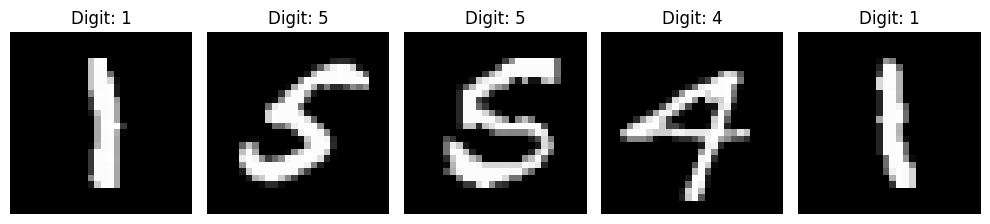

In [62]:
# To visualize sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Convert image data to float explicitly to avoid dtype issues
    img = X[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {int(y[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [57]:
def ReLu(x):
    """
    x : np.array representing a digit somewhere in the neural network
    """
    if type(x) is np.ndarray:
        x[x < 0] = 0
    return x 

x = np.array([0.1, 0.3, -0.3, -0.3, 0.8])

ReLu(x)

array([0.1, 0.3, 0. , 0. , 0.8])

In [58]:
def softmax(x):
    """
    x : np.array representing a digit somewhere in the neural network
    
    Used to compute the final output probabilities for each digit.
    """
    exp_x = np.exp(x)

    div = np.sum(exp_x)

    return exp_x / div 

softmax(x)

array([0.16543062, 0.20205741, 0.14968781, 0.14968781, 0.33313635])

In [97]:
def forward(x, W1, b1, W2, b2):
    """
    x : np.array of 784 pixels representing one 28x28 digit
    W : np.array of weight matrices for each layer in the network
    b : np.array of biases for each layer in the network
    """

    # hidden layer
    Z1 = W1 @ x + b1
    A1 = ReLu(Z1)
    
    # final layer
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

# Prepare Data

In [92]:
# data points previously horizontal, now vertical
X_train = X[1000:].T
y_train = y[1000:]

X_test = X[:1000].T
y_test = y[:1000]

In [ ]:
def init():  
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Test for first data point

In [98]:
W1, b1, W2, b2 = init()

print(X_train.shape)

Z1, A1, Z2, A2 = forward(X_train[:,0], W1, b1, W2, b2)

print(Z1)
print(A1)

(784, 69000)
[[0.21998471 0.         2.31112317 2.8781999  2.25811356 0.75017082
  0.         0.         0.         2.62783563]
 [0.4522227  0.         2.54336117 3.11043789 2.49035156 0.98240882
  0.         0.         0.         2.86007362]
 [0.04195847 0.         2.13309693 2.70017366 2.08008732 0.57214458
  0.         0.         0.         2.44980939]
 [0.01698608 0.         2.10812455 2.67520127 2.05511494 0.54717219
  0.         0.         0.         2.424837  ]
 [0.16175549 0.         2.25289396 2.81997068 2.19988434 0.6919416
  0.         0.         0.         2.56960641]
 [0.62483964 0.         2.7159781  3.28305483 2.66296849 1.15502575
  0.         0.         0.         3.03269056]
 [0.         0.         1.8833455  2.45042222 1.83033589 0.32239315
  0.         0.         0.         2.20005795]
 [0.         0.         2.06942955 2.63650628 2.01641994 0.5084772
  0.         0.         0.         2.38614201]
 [0.2649093  0.         2.35604776 2.92312449 2.30303815 0.79509541
 